In this notebook we capture a matplotlib plot and save it to a file.

In [1]:
import IPython
import sys
{'python': sys.version, 'IPython':IPython.__version__}

{'IPython': '6.2.1',
 'python': '3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]'}

In [2]:
from IPython.display import display, Image
from IPython.utils import capture
from base64 import decodebytes
import pandas as pd
import matplotlib.pyplot as plt

We start with a simple matplotlib plot

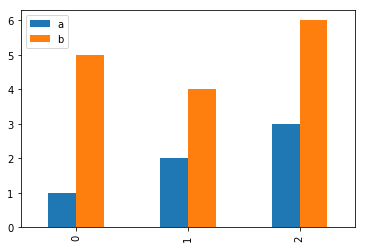

In [3]:
df = pd.DataFrame({'a':[1,2,3], 'b':[5,4,6]})
df.plot(kind='bar')
plt.show()

When captured, the plot is not displayed. The captured object has one output.

In [4]:
with capture.capture_output() as cap:
    df.plot(kind='bar')
    plt.show()
len(cap.outputs)

1

The output can be displayed again:

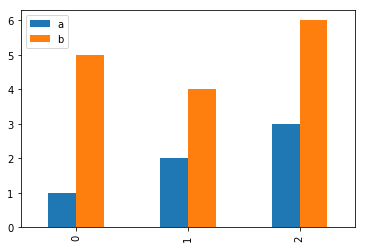

In [5]:
display(cap.outputs[0])

Output has two members: data (a list of representations, here: image and text), and metadata (here, empty).

In [6]:
ro = cap.outputs[0]
def trunc(x, n=80):
    if isinstance(x, str):
        if len(x)>n:
            return x[:n-3]+'...'
    if  isinstance(x, bytes):
        if len(x)>n:
            return x[:n-3]+b'...'
    return x
{'data':{k:trunc(v) for k, v in ro.data.items()}, 
 'metadata':ro.metadata}

{'data': {'image/png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01n\x00\x00\x00\xf8\x08\x06\x00\x00\x00\xcc\xea\x0ce\x00\x00\x00\x04sBIT\x08\x08\x08\x08|\x08d\x88\x00\x00\x00\tpHYs\x00\x00\x0b\x12\x00\x00\x0b\x12\x01\xd2\xdd~\xfc\x00\x00\x009tEX...',
  'text/plain': '<matplotlib.figure.Figure at 0x22b78fd5080>'},
 'metadata': {}}

Finally we save the binary data to a png file

In [7]:
image_data = ro.data['image/png']
with open('saveplot.png', 'wb') as f:
    f.write(image_data)

And load again the image:

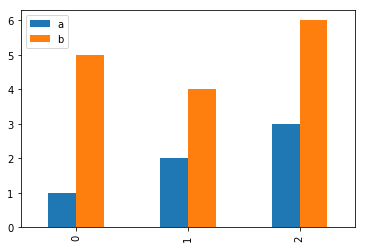

In [8]:
Image(filename='saveplot.png')

In [9]:
import os
os.remove('saveplot.png')